<a href="https://colab.research.google.com/github/NiaRamadhani31/DIFG2130_B_25_2311531006/blob/main/Pratikum5/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


1. from sklearn.datasets import load_iris
Mengimpor fungsi load_iris dari library sklearn.datasets.

Fungsi ini digunakan untuk memuat dataset Iris, yaitu dataset bunga Iris yang sangat populer dalam machine learning.

2. iris = load_iris()
Memanggil fungsi load_iris() dan menyimpannya dalam variabel iris.

Dataset ini berupa struktur dictionary-like yang berisi:

'data': fitur/atribut numerik

'target': label kelas (setosa, versicolor, virginica)

'feature_names': nama-nama fitur

'target_names': nama-nama kelas

3. x = iris['data']
Menyimpan fitur (atribut) dataset ke dalam variabel x.

x berupa array NumPy dengan bentuk (150, 4) yaitu:

150 baris (sampel)

4 kolom (fitur): panjang sepal, lebar sepal, panjang petal, lebar petal

4. y = iris['target']
Menyimpan label kelas (target output) ke dalam variabel y.

y berupa array berisi angka 0, 1, dan 2 yang mewakili:

0 = setosa

1 = versicolor

2 = virginica

5. n_samples, n_features = x.shape
Mengambil jumlah baris (n_samples) dan jumlah kolom (n_features) dari array x menggunakan .shape.

.shape akan mengembalikan (150, 4) → jadi n_samples = 150, n_features = 4.

6. print(...)
Menampilkan jumlah sampel dan jumlah fitur ke layar.

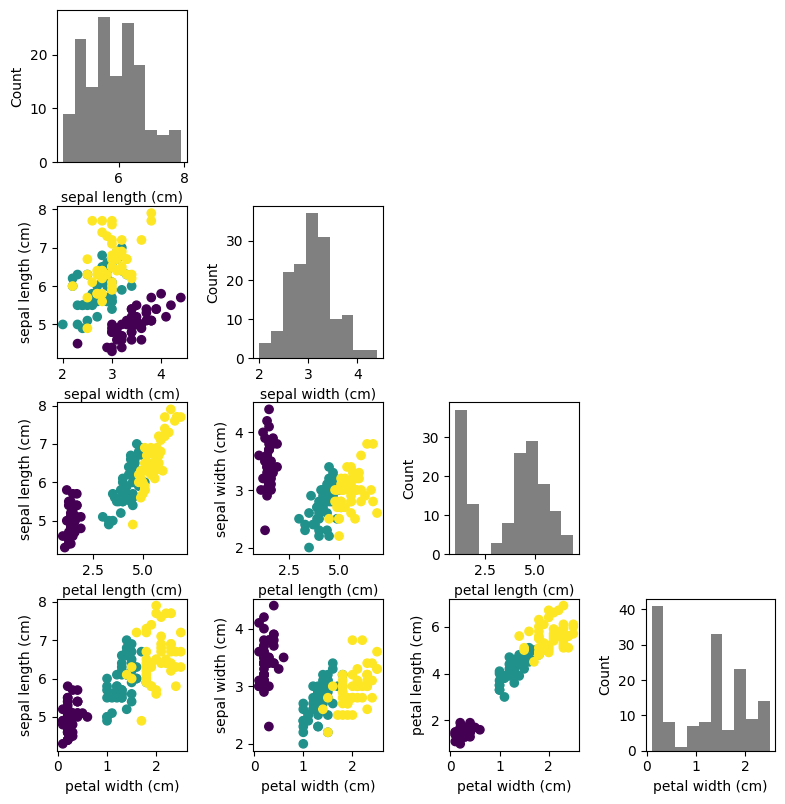

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, j], X[:, i], c = y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
    ax[i, i].hist(X[:, i], color='grey')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])

1. Membuat Grid Plot
Sebuah grid ukuran 4x4 dibuat (karena ada 4 fitur dalam dataset Iris), di mana:

Setiap baris dan kolom merepresentasikan satu fitur.

Contohnya: baris pertama menunjukkan hubungan fitur pertama dengan fitur lainnya.

2. Nama Fitur
Nama-nama fitur seperti:

sepal length (cm)

sepal width (cm)

petal length (cm)

petal width (cm)
...digunakan untuk memberi label pada sumbu x dan y setiap plot.

3. Scatter Plot Kombinasi Fitur
Di bagian luar diagonal (segitiga atas):

Scatter plot ditampilkan untuk melihat hubungan dua fitur sekaligus.

Titik-titik diberi warna berdasarkan kelas bunga (setosa, versicolor, virginica).

Hanya separuh kombinasi ditampilkan untuk menghindari pengulangan yang tidak perlu.

Bagian cermin bawahnya (segitiga bawah) sengaja dikosongkan.

4. Histogram Diagonal
Setiap elemen diagonal menampilkan histogram dari distribusi satu fitur saja.

Contohnya: sepal length saja, sepal width saja, dst.

Ini membantu melihat bagaimana data menyebar untuk masing-masing fitur.

5. Hasil Visualisasi
Hasil akhirnya adalah:

Kombinasi scatter plot dan histogram dalam satu grid.

Scatter plot menunjukkan korelasi antar fitur.

Histogram menunjukkan distribusi data dalam fitur tunggal.

Warna titik menunjukkan kelas bunga (klasifikasi target).



In [49]:
def mean(x): # np.mean(X, axis = 0)
    return sum(x)/len(x)

def std(x): # np.std(x, axis = 0)
    return (sum([(i - mean(x))*2 for i in x])/len(x))*0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X)

1. Fungsi Menghitung Rata-Rata (Mean)
Fungsi pertama digunakan untuk menghitung rata-rata dari suatu kumpulan data.

Caranya: jumlahkan semua nilai, lalu dibagi jumlah data.

Misalnya, dari 10 angka, kita cari nilai tengahnya.

2. Fungsi Menghitung Simpangan Baku (Standard Deviation)
Fungsi kedua menghitung standar deviasi dari data.

Ini mengukur seberapa menyebar data dari rata-ratanya.

Nilai yang besar berarti datanya tersebar jauh, nilai kecil berarti datanya rapat.

Dalam perhitungan ini, digunakan pendekatan yang mirip rumus statistik: akar dari rata-rata selisih kuadrat data terhadap rata-ratanya.

3. Fungsi Standardisasi
Fungsi ketiga bertujuan untuk melakukan standardisasi:

Caranya dengan mengurangkan tiap data dengan nilai rata-ratanya.

Lalu hasilnya dibagi dengan standar deviasinya.

Hasil akhirnya adalah data baru yang sudah dinormalisasi: rata-ratanya jadi 0, dan deviasinya 1.

4. Proses Penerapan
Setelah fungsi tersedia, fungsi standardisasi dipakai untuk mengubah data aslinya (dalam hal ini X) menjadi x_std yang sudah distandarkan.

In [50]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [51]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

Kovarians dihitung dengan cara mengalikan setiap nilai fitur dengan fitur lainnya, lalu dihitung rata-ratanya.

Perhitungannya mempertimbangkan banyaknya sampel (dalam rumus ini dibagi jumlah data dikurangi 1).

Proses ini bisa dilakukan dengan perkalian matriks transpos dari data.
Hasil dari fungsi ini adalah matriks simetris berukuran jumlah fitur x jumlah fitur.

Contohnya, jika kamu punya 4 fitur (seperti di dataset Iris), maka akan dihasilkan matriks 4x4.



In [52]:
cov_mat

array([[ 5.41757488e+29, -4.95723348e+28,  4.43841756e+29,
         1.02311233e+30],
       [-4.95723348e+28,  3.28157537e+29, -1.69770867e+29,
        -3.56426917e+29],
       [ 4.43841756e+29, -1.69770867e+29,  4.78479921e+29,
         1.13186926e+30],
       [ 1.02311233e+30, -3.56426917e+29,  1.13186926e+30,
         2.88800290e+30]])

cov_mat adalah matriks kovarians yang dihasilkan dari data yang sudah distandarisasi (biasanya disimpan dalam variabel X_std).



In [53]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs @ np.diag(signs)
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [3.77028573e+30 3.24352429e+29 1.29144901e+29 1.26147887e+28]
Eigenvectors 
 [[ 0.3258659  -0.11214649  0.34932169  0.87132596]
 [ 0.43751036  0.89768219 -0.04218603 -0.03117238]
 [ 0.77753535 -0.3827857   0.2411769  -0.4367466 ]
 [-0.31278568  0.18725641  0.90444922 -0.22152146]]


Tujuan Utama:
Melakukan eigen decomposition terhadap matriks kovarians untuk mendapatkan:

Eigenvalues (nilai eigen) → menunjukkan berapa banyak variansi data yang bisa dijelaskan oleh tiap komponen utama.

Eigenvectors (vektor eigen) → menunjukkan arah dari komponen utama (principal components).



In [54]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(3.7702857259141706e+30), array([ 0.3258659 ,  0.43751036,  0.77753535, -0.31278568])), (np.float64(3.243524288778495e+29), array([-0.11214649,  0.89768219, -0.3827857 ,  0.18725641])), (np.float64(1.2914490088339642e+29), array([ 0.34932169, -0.04218603,  0.2411769 ,  0.90444922])), (np.float64(1.261478865339787e+28), array([ 0.87132596, -0.03117238, -0.4367466 , -0.22152146]))]


1. Membuat Pasangan (eigenvalue, eigenvector)
Dibuat list yang isinya pasangan:

Nilai eigen (menggambarkan jumlah informasi/variasi yang dijelaskan)

Vektor eigen (menggambarkan arah komponen utama)

Nilai eigen diubah ke nilai absolut hanya untuk memastikan perbandingan tetap valid (karena nilai eigen bisa sangat kecil/negatif akibat pembulatan komputer)

2. Mengurutkan Berdasarkan Nilai Eigen
Daftar pasangan tersebut kemudian diurutkan dari yang terbesar ke terkecil berdasarkan nilai eigennya.

Tujuannya adalah agar komponen dengan pengaruh paling besar terhadap data berada di urutan teratas.

3. Menyimpan Hasil Urutan
Setelah diurutkan:

Disimpan lagi daftar nilai eigen yang sudah diurutkan

Dan juga daftar vektor eigennya, dalam urutan yang sama

Ini akan digunakan nanti untuk:

Menentukan berapa banyak komponen utama yang mau digunakan

Memproyeksikan data ke ruang berdimensi lebih rendah




In [55]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

(2, 4)


1. k = 2
Artinya kamu memilih 2 komponen utama (principal components) teratas.

Komponen ini dipilih karena mereka menjelaskan variasi terbesar dalam data, berdasarkan nilai eigen yang sudah diurutkan sebelumnya.

2. W = eig_vecs_sorted[:k, :]
W adalah matriks proyeksi.

Isinya adalah 2 vektor eigen teratas yang disusun dalam bentuk baris.

Bentuk matriks ini: k × jumlah_fitur_asli (misalnya: 2 × 4)

3. Fungsi Matriks W
Matriks W digunakan untuk mentransformasi (memproyeksikan) data asli berdimensi tinggi (misalnya 4 dimensi) menjadi data baru berdimensi k (misalnya 2 dimensi).



Explained variance: [89.    7.66  3.05  0.3 ]
Cumulative explained variance: [ 89.    96.66  99.71 100.01]


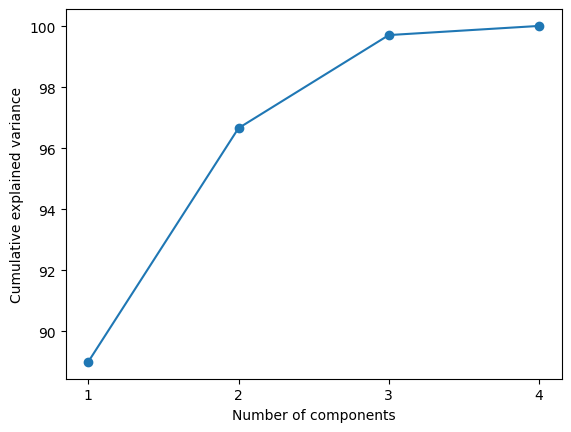

In [56]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

1. Total Variansi (eig_vals_total)
Ini adalah jumlah dari semua nilai eigen.

Total ini mewakili 100% variasi yang ada dalam data asli.

2. Explained Variance per Komponen
Masing-masing nilai eigen dibagi total nilai eigen → hasilnya adalah persentase variasi yang dijelaskan oleh komponen tersebut.

Lalu dibulatkan menjadi dua angka di belakang koma (misalnya: 72.77%).

Contoh:

Komponen 1 menjelaskan 72.77%

Komponen 2 menjelaskan 23.03%

Komponen 3 dan 4 sisanya kecil

3. Cumulative Explained Variance
Ini adalah akumulasi dari explained variance.

Artinya: seberapa besar total variasi yang bisa dijelaskan jika kita memilih 1, 2, 3, dst. komponen.

Sangat berguna untuk menentukan:

"Berapa komponen yang cukup?"

"Apakah 2 komponen cukup untuk menjelaskan 95% data?"

In [57]:
X_proj = X_std.dot(W.T)

print(X_proj.shape) # Dimensi data hasil transformasi
print(X.shape)      # Dimensi data awal

(150, 2)
(150, 4)


Proses yang Terjadi:
X_std adalah data asli yang telah distandarisasi.

Dimensinya biasanya: jumlah_sample × jumlah_fitur (misal: 150 × 4)

W.T adalah transpose dari matriks proyeksi (eigenvectors teratas).

Jika kamu ambil 2 komponen utama, maka dimensi W.T: jumlah_fitur × 2 (misal: 4 × 2)

Dot product (perkalian matriks):

X_std (150 × 4) × W.T (4 × 2) → hasilnya X_proj (150 × 2)

Artinya: setiap sampel data kini direpresentasikan dalam 2 dimensi utama baru



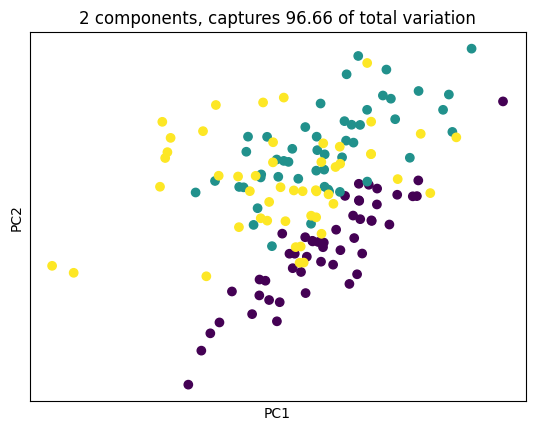

In [58]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

Menampilkan visualisasi 2 dimensi dari data hasil reduksi dimensi menggunakan Principal Component Analysis (PCA).

Tujuannya adalah melihat pola atau klaster pada data berdasarkan dua komponen utama (PC1 dan PC2).



Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Cumulative explained variance:
 [0.72962445 0.95813207]
Transformed data shape: (150, 2)


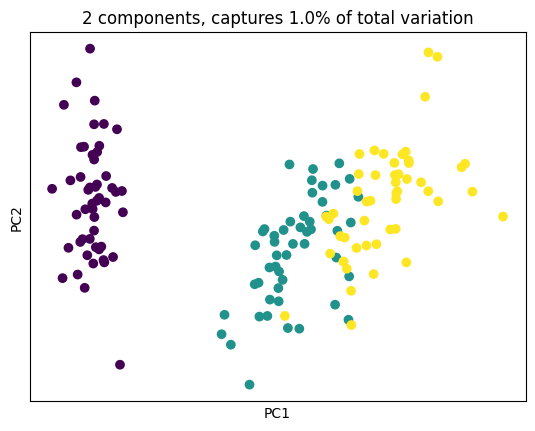

In [60]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round()))
plt.show()

1. Standarisasi Data
Data (X) harus distandarisasi dulu agar semua fitur memiliki skala yang sama (mean = 0, std = 1)

Ini penting karena PCA sensitif terhadap perbedaan skala

2. Melatih Model PCA
PCA diterapkan dengan menetapkan jumlah komponen utama sebanyak 2 (n_components=2)

Model ini kemudian “belajar” dari data standar (X_std) untuk mencari arah (komponen) dengan variasi terbesar

3. Komponen PCA (pca.components_)
Menampilkan arah dari komponen utama (PC1 dan PC2) dalam bentuk vektor (kombinasi linier dari fitur asli)

Setiap baris mewakili satu komponen, dan setiap nilai menunjukkan seberapa besar kontribusi fitur asli terhadap komponen itu

4. Rasio Variansi Terjelaskan (explained_variance_ratio_)
Menunjukkan berapa persen informasi yang bisa dijelaskan oleh masing-masing komponen utama

Misalnya: PC1 = 72.7%, PC2 = 23%, maka total ~95.7% variasi bisa ditangkap hanya dengan 2 dimensi